<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [1]:
#Start Here

## Approach
* Apply NLP to Amazon Reviews
* Estimate a topic model on the Amazon Reviews
* Create visualizations relating the topics to the review scores


In [2]:
import pandas as pd

df = pd.read_csv('../module1-text-data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [4]:
df.head(2)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."


In [8]:
df['reviews.text'][0]

'I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.'

# Applying NLP
* We need to tokenize the text
* How should we do it?
- Use Spacy
- Figure our what our unit of analysis (lemmas, adj, keywords, nouns, spacy tokens, etc.) Try different ones
- Keyword extraction NEW TECHNIQUE

In [9]:
import spacy

nlp = spacy.load('en_core_web_lg')

In [11]:
# Try Lemmatization as our first Experiment

def get_lemmas(text):
    
    lemmas = []
    
    doc = nlp(text)
    
    STOP_WORDS = nlp.Defaults.stop_words.union(['batteries','I', 'amazon', 'i', 'Amazon', 'it', "it's", 'it.', 'the', 'this', 'tablet.'])
    
    for token in doc:
        conditions = (token.is_stop == False) and (token.is_punct == False) and (token.pos_ != 'PRON') and (token.text not in STOP_WORDS)
        if conditions:
            lemmas.append(token.lemma_)
    
    return lemmas

In [12]:
from tqdm import tqdm
tqdm.pandas()

/home/jepoy/miniconda3/envs/ds-unit-4/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [13]:
df['lemmas'] = df['reviews.text'].progress_apply(get_lemmas)

100%|██████████| 28332/28332 [02:57<00:00, 159.85it/s]


## Topic Modeling w/ Gensim
* Learn a Vocabulary
* Create a Bag of Words (BoW) representation of each document
* Estimate our LDA model
* Clean up the results
* Add topic information back to dataframe

In [17]:
import gensim
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore

In [18]:
# like countVectorizer fit

id2word = corpora.Dictionary(df['lemmas'])

In [19]:
# for statistical trimming
id2word.filter_extremes(no_below=50, no_above=.90)

In [20]:
#how big is corpus
len(id2word.keys())

787

In [21]:
id2word[0]

'3'

In [22]:
# Transform

corpus = [id2word.doc2bow(doc) for doc in df['lemmas']]

In [24]:
df[['reviews.text', 'lemmas']]

,reviews.text,lemmas
0,I order 3 of them and one of the item is bad q...,"[order, 3, item, bad, quality, miss, backup, s..."
1,Bulk is always the less expensive way to go fo...,"[bulk, expensive, way, product, like]"
2,Well they are not Duracell but for the price i...,"[Duracell, price, happy]"
3,Seem to work as well as name brand batteries a...,"[work, brand, well, price]"
4,These batteries are very long lasting the pric...,"[long, last, price, great]"
...,...,...
28327,I got 2 of these for my 8 yr old twins. My 11 ...,"[get, 2, 8, yr, old, twin, 11, yr, old, well, ..."
28328,I bought this for my niece for a Christmas gif...,"[buy, niece, Christmas, gift.she, 9, year, old..."
28329,"Very nice for light internet browsing, keeping...","[nice, light, internet, browsing, keep, email,..."
28330,This Tablet does absolutely everything I want!...,"[Tablet, absolutely, want, watch, tv, show, mo..."


In [25]:
# the key to LDA is in the preprocessing than it is in the modeling

lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   num_topics = 5, # 15 to 5
                   passes=10, # 2 to 15, usually 100 to get better results
                   workers=12,
                   random_state=42)

# parameter to tune are
#.num_topics
#.passes

# need more passes
# need more stop words
# need statical trimming see id2word

# look up coherence scores

In [26]:
lda.print_topics()

[(0,
  '0.069*"tablet" + 0.034*"app" + 0.032*"kid" + 0.030*"great" + 0.021*"game" + 0.017*"good" + 0.015*"time" + 0.014*"play" + 0.014*"use" + 0.012*"download"'),
 (1,
  '0.089*"good" + 0.086*"great" + 0.059*"price" + 0.046*"work" + 0.032*"buy" + 0.023*"tablet" + 0.022*"product" + 0.022*"battery" + 0.014*"quality" + 0.013*"life"'),
 (2,
  '0.039*"read" + 0.033*"easy" + 0.029*"book" + 0.028*"use" + 0.028*"great" + 0.027*"tablet" + 0.022*"screen" + 0.019*"like" + 0.016*"Kindle" + 0.015*"love"'),
 (3,
  '0.094*"love" + 0.046*"old" + 0.040*"buy" + 0.040*"year" + 0.036*"tablet" + 0.034*"use" + 0.028*"easy" + 0.026*"great" + 0.023*"gift" + 0.021*"purchase"'),
 (4,
  '0.021*"long" + 0.017*"time" + 0.016*"charge" + 0.016*"buy" + 0.014*"like" + 0.014*"Kindle" + 0.013*"battery" + 0.012*"brand" + 0.011*"work" + 0.010*"purchase"')]

In [27]:
import re

words = [re.findall(r'"([^"]*)"', t[1]) for t in lda.print_topics()]

In [28]:
topics = [' '.join(t[0:5]) for t in words]

In [29]:
for id, t in enumerate(topics):
    print(f"------- Topic {id} -------")
    print(t, end="\n\n")

------- Topic 0 -------
tablet app kid great game

------- Topic 1 -------
good great price work buy

------- Topic 2 -------
read easy book use great

------- Topic 3 -------
love old buy year tablet

------- Topic 4 -------
long time charge buy like



## Analyzing the Results of LDA
- How good are the topics themselves?
    * Using tntertopic distance visualization
    * Looking at some of the tokens distributions
- Using the LDA topics for analysis:
    * Score each review with a top topic
    * Summary visualization of top topic versus sentiment

In [30]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [31]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

/home/jepoy/miniconda3/envs/ds-unit-4/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.130953  0.119080       1        1  25.671870
2      0.014104 -0.015074       2        1  19.366537
1      0.090668 -0.089513       3        1  19.127379
0     -0.032920 -0.060069       4        1  19.062871
3     -0.202804  0.045575       5        1  16.771343, topic_info=          Term         Freq        Total Category  logprob  loglift
70        love  6359.000000  6359.000000  Default  30.0000  30.0000
27        good  6496.000000  6496.000000  Default  29.0000  29.0000
18       great  8827.000000  8827.000000  Default  28.0000  28.0000
425       read  2352.000000  2352.000000  Default  27.0000  27.0000
15       price  4623.000000  4623.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
130       game   455.978897  2166.872513   Topic5  -4.6000   0.2269
426       fire   356.024966  1337.012127   Topic5  -4.8474   0.4623
257       play   355.081954  1590.633461   Topic5  -4.8501   0.2860
123  recommend   300.679991  1241.843995   Topic5  -5.0164   0.3672
254      child   288.811954   986.590523   Topic5  -5.0566   0.5570

[344 rows x 6 columns], token_table=      Topic      Freq Term
term                      
154       1  0.283676    2
154       2  0.005849    2
154       3  0.055565    2
154       4  0.148175    2
154       5  0.505938    2
...     ...       ...  ...
541       1  0.003796   yr
541       2  0.045555   yr
541       3  0.034167   yr
541       4  0.003796   yr
541       5  0.914903   yr

[1130 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 2, 1, 4])

### Label Our Review with the most common topic

In [32]:
doc_topics = [lda[doc] for doc in corpus]

/home/jepoy/miniconda3/envs/ds-unit-4/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
doc_topics[0]

/home/jepoy/miniconda3/envs/ds-unit-4/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 0.022384927),
 (1, 0.2560677),
 (2, 0.02234057),
 (3, 0.02263727),
 (4, 0.6765695)]

In [34]:
def update(doc):
    d_dist = {k:0 for k in range(0,5)}
    for t in doc:
        d_dist[t[0]] = t[1]
    return d_dist

new_distro = [update(d) for d in doc_topics]

/home/jepoy/miniconda3/envs/ds-unit-4/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
dft = pd.DataFrame.from_records(new_distro)
dft.columns = topics

/home/jepoy/miniconda3/envs/ds-unit-4/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
dft.head()

/home/jepoy/miniconda3/envs/ds-unit-4/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tablet app kid great game,good great price work buy,read easy book use great,love old buy year tablet,long time charge buy like
0,0.022385,0.256068,0.022341,0.022637,0.676570
1,0.033798,0.223605,0.034137,0.033530,0.674930
2,0.050537,0.238379,0.050961,0.050920,0.609202
3,0.040198,0.838395,0.040379,0.040140,0.040888
4,0.040216,0.837573,0.040155,0.040105,0.041951


In [37]:
df['primary_topic'] = dft.idxmax(axis=1)

/home/jepoy/miniconda3/envs/ds-unit-4/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
df.head()

/home/jepoy/miniconda3/envs/ds-unit-4/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,lemmas,primary_topic
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht...","[order, 3, item, bad, quality, miss, backup, s...",long time charge buy like
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht...","[bulk, expensive, way, product, like]",long time charge buy like
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht...","[Duracell, price, happy]",long time charge buy like
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht...","[work, brand, well, price]",good great price work buy
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht...","[long, last, price, great]",good great price work buy


In [39]:
df[['reviews.text', 'lemmas','primary_topic']]

/home/jepoy/miniconda3/envs/ds-unit-4/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,reviews.text,lemmas,primary_topic
0,I order 3 of them and one of the item is bad q...,"[order, 3, item, bad, quality, miss, backup, s...",long time charge buy like
1,Bulk is always the less expensive way to go fo...,"[bulk, expensive, way, product, like]",long time charge buy like
2,Well they are not Duracell but for the price i...,"[Duracell, price, happy]",long time charge buy like
3,Seem to work as well as name brand batteries a...,"[work, brand, well, price]",good great price work buy
4,These batteries are very long lasting the pric...,"[long, last, price, great]",good great price work buy
...,...,...,...
28327,I got 2 of these for my 8 yr old twins. My 11 ...,"[get, 2, 8, yr, old, twin, 11, yr, old, well, ...",love old buy year tablet
28328,I bought this for my niece for a Christmas gif...,"[buy, niece, Christmas, gift.she, 9, year, old...",love old buy year tablet
28329,"Very nice for light internet browsing, keeping...","[nice, light, internet, browsing, keep, email,...",read easy book use great
28330,This Tablet does absolutely everything I want!...,"[Tablet, absolutely, want, watch, tv, show, mo...",tablet app kid great game


/home/jepoy/miniconda3/envs/ds-unit-4/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'long time charge buy like'),
  Text(1, 0, 'good great price work buy'),
  Text(2, 0, 'read easy book use great'),
  Text(3, 0, 'tablet app kid great game'),
  Text(4, 0, 'love old buy year tablet')])

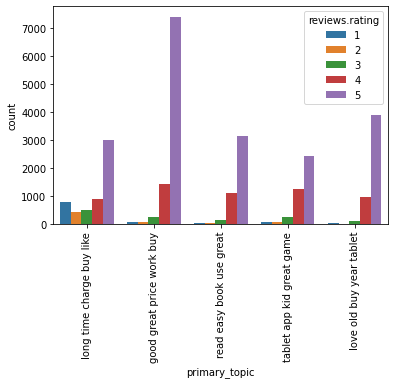

In [40]:
# Simple Bar Graph?
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x="primary_topic", hue="reviews.rating", data=df)
plt.xticks(rotation=90)

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling